# One Max Problem

## Note: Run all the code cells below in order to ensure everything runs correctly

The one max problem is a simple genetic algorithm problem. The objective is to find a bit string containing all 1s with a set length. We will use the functionality of the DEAP Python library to solve the problem.

First, we will import all the necessary modules.

In [23]:

import random

from deap import base
from deap import creator
from deap import tools

Next, we need to define the fitness objective and individual classes using DEAP's Creator.

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In the first line, we defined the name of the class, the inherited class, and the objectives. We inherited from DEAP's base.Fitness to create a class with all the functionality of an objective. Then, we defined a tuple, (1.0,). This tuple represents a single objective we want to maximize. If we wanted to minimize a single objective, we would replace the tuple with (-1.0,). Furthermore, if we wanted to create a multi-objective problem, we would replace the tuple with something like (1.0, 1.0).

In the second line, we defined an "Individual" class as a list with a fitness defined as the objective above. You can think of the individual class as the individuals in our population. For the one max problem, we will define our bit string individuals as a list of Booleans represented as 1s and 0s.

Next, we will start defining the functions available to our genetic algorithm using DEAP's Toolbox.

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In the code above, we started by defining our toolbox. Then, we added a random boolean generator and initializers for our individuals and population.

We defined "attr_bool" as a random generator producing either 0 or 1. Then, we defined "individual" as an individual generator. initRepeat takes in 3 arguments, a container (in this case a list), a function to fill the container, and how many times to call the function. This tells DEAP to initialize each individual with a list of 100 booleans essentially creating a bit string of length 100.

The final line defines our population as a list of individuals. We will later call the population function and tell it to produce a set number of individuals.

Documentation for creating types such as Fitness, Individuals, and Population can be found here: https://deap.readthedocs.io/en/master/tutorials/basic/part1.html

Next, we need to define our evaluation function for our fitness objective.

In [4]:
def evalOneMax(individual):
    return sum(individual),

We defined a simple evaluation function which returns the sum of the Boolean integers of an individual. This means individuals with more 1s will receive a higher fitness score with the maximum fitness score being 100. The sum is returned as a tuple to match the fitness objective we previously defined.

Next, we will define our genetic algorithm's genetic operators.

In [5]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In the code above, we defined four functions for our genetic algorithm to use. Evaluate is defined as the evaluation function we previously defined. Mate is defined as a two-point crossover function. Mutate is defined as flipping a bit in our bitstring to either 1 or 0 respectively with an independent probability of flipping each individual bit of 5%.

Select is defined as a tournament selection of 3 individuals. Tournament selection is a common genetic operator where individuals are sampled and competed against each other. This selection process tends to preserve more varied traits than having the entire population compete against each other. There may be an individual in a sample with a valuable trait which is not in the top percentage of individuals in the entire population.

Next, we will start defining our main genetic algorithm.

In [6]:
def main():
    pop = toolbox.population(n=300)

We initialized our population with 300 individuals in the line above. n is the parameter we left empty earlier when we defined our population.

Next, we will evaluate our population.

In [7]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

In the code above, we mapped the evaluation function we defined earlier to our entire population. Then, we assigned each individual their respective fitness value.

Next, we will begin the evolutionary process.

In [8]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # Begin the evolution
    for g in range(40):
        print("-- Generation %i --" % g)

We start by defining the evolutionary loop and set the algorithm to run for 40 generations.

Next, we will add selection.

In [9]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # Begin the evolution
    for g in range(40):
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

In the code above, we use tournament selection on the population and then make a list consisting of an exact copy of the selected individuals. This makes sure our offspring are a completely separate instance.

Next, we will perform crossover and mutation on the offspring.

In [10]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # Begin the evolution
    for g in range(40):
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values

The above code mates two individuals with a 50% probability and mutates an individual with a 20% probability using the mate and mutate functions we previously defined. The delete statements invalidate the fitness of the mated and mutated offspring. This is important for the next step.

Next, we will re-evaluate the modified offspring and replace the old population with the offspring.

In [11]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # Begin the evolution
    for g in range(40):
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values        
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # Replace population
        pop[:] = offspring

Finally, we will define statistics for our population and print them out.

In [12]:
def main():
    pop = toolbox.population(n=300)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    # Begin the evolution
    for g in range(40):
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values        
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # Replace population
        pop[:] = offspring
    
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
        
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

In [13]:
main()

-- Generation 0 --
  Min 42.0
  Max 65.0
  Avg 54.67333333333333
  Std 4.2229478908564575
-- Generation 1 --
  Min 50.0
  Max 70.0
  Avg 58.49333333333333
  Std 3.600456761146995
-- Generation 2 --
  Min 51.0
  Max 73.0
  Avg 61.333333333333336
  Std 3.5065018972695543
-- Generation 3 --
  Min 50.0
  Max 76.0
  Avg 63.72
  Std 3.3027665171287546
-- Generation 4 --
  Min 55.0
  Max 79.0
  Avg 66.24333333333334
  Std 3.5801474209248942
-- Generation 5 --
  Min 59.0
  Max 79.0
  Avg 68.69666666666667
  Std 3.12591142264476
-- Generation 6 --
  Min 61.0
  Max 80.0
  Avg 70.61
  Std 3.12696338322022
-- Generation 7 --
  Min 64.0
  Max 81.0
  Avg 72.84333333333333
  Std 3.084172858680505
-- Generation 8 --
  Min 63.0
  Max 82.0
  Avg 74.92
  Std 3.1612655693566443
-- Generation 9 --
  Min 68.0
  Max 83.0
  Avg 76.82
  Std 2.729029131394777
-- Generation 10 --
  Min 68.0
  Max 85.0
  Avg 78.42
  Std 2.655233825233886
-- Generation 11 --
  Min 71.0
  Max 86.0
  Avg 79.71333333333334
  Std 2.64

I encourage you to run the code above several times. You might see the algorithm not always achieve the global maxmimum fitness in 40 generations. This is due to how our population was randomly initialized, the probability of crossover and mutation occuring, and the independent probability of flipping any bit when an individual is mutated.

You can think of the genetic algorithm we used as a search over the space of all possible bit strings of length 100. This approach is generally better than random search because we are optimizing our search space using our fitness objective. This concept will become important when we later talk about multi-objective problems.

Documentation for Operators and Algorithms can be found here: https://deap.readthedocs.io/en/master/tutorials/basic/part2.html

You can find another notebook example of the One Max Problem here: https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb

# The N Queens Problem

Now, we're going to focus on experimenting with the genetic algorithm framework with a different problem.

The problem is to determine a configuration of n queens on a nxn chessboard such that no queen can be taken by one another. In this version, each queen is assigned to one column, and only one queen can be on each line.

This example can be found in the DEAP source code here: https://github.com/DEAP/deap/blob/master/examples/ga/nqueens.py

First, we need to create our fitness and individual classes. We will also initialize a variable called n to store the size of our problem. Feel free to change this variable from the default value of n = 20.

In [14]:
# Problem parameter
n = 20

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualQueen", list, fitness=creator.FitnessMin)

The main difference with our creation this time is the weight of the fitness objective. This time we will be minimizing an objective instead of maximizing an objective. This is because we want to minimize the number of conflicts between two queens on the chessboard.

Next, we will start defining our toolbox.

In [15]:
#Since there is only one queen per line, 
#individual are represented by a permutation
toolbox_q = base.Toolbox()
toolbox_q.register("permutation", random.sample, range(n), n)

#Structure initializers
#An individual is a list that represents the position of each queen.
#Only the line is stored, the column is the index of the number in the list.
toolbox_q.register("individual", tools.initIterate, creator.IndividualQueen, toolbox_q.permutation)
toolbox_q.register("population", tools.initRepeat, list, toolbox_q.individual)

Similarly to the previous problem, we defined a function called "permutation" to help create our individuals and population. In this case, our individual becomes the return value of toolbox_q.permutation, which happens to be a list of integers sampled from range(n) without replacement.

If n = 10, then an individual could look like this: [7,0,4,6,5,1,9,2,8,3]. If the first integer in the list is 7, then the queen on the first row will be in column 8, and if the second integer is 0, then the queen on the second row will be in column 1 and so on down the list.

<img src="files/images/board_fancy.jpg">

The image above shows the solution for a N Queens problem where n = 8.

Next, we will define our evaluation function.

In [16]:
def evalNQueens(individual):
    size = len(individual)
    #Count the number of conflicts with other queens.
    #The conflicts can only be diagonal, count on each diagonal line
    left_diagonal = [0] * (2*size-1)
    right_diagonal = [0] * (2*size-1)
    
    #Sum the number of queens on each diagonal:
    for i in range(size):
        left_diagonal[i+individual[i]] += 1
        right_diagonal[size-1-i+individual[i]] += 1
    
    #Count the number of conflicts on each diagonal
    sum_ = 0
    for i in range(2*size-1):
        if left_diagonal[i] > 1:
            sum_ += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            sum_ += right_diagonal[i] - 1
    return sum_,

The problem is to determine a configuration of n queens on a nxn chessboard such that no queen can be taken by one another. In this version, each queens is assigned to one column, and only one queen can be on each line. The evaluation function therefore only counts the number of conflicts along the diagonals.

I encourage you to modify the above evaluation function. The evaluation function(s) defines your objective(s). If you tweak the evaluation function, then your domain will remain the same. However, the objective(s) you are trying to minimize or maximize in that domain will change.

Next, we will define our crossover function.

In [17]:
def cxPartialyMatched(ind1, ind2):
    """Executes a partially matched crossover (PMX) on the input individuals.
    The two individuals are modified in place. This crossover expects
    :term:`sequence` individuals of indices, the result for any other type of
    individuals is unpredictable.
    
    :param ind1: The first individual participating in the crossover.
    :param ind2: The second individual participating in the crossover.
    :returns: A tuple of two individuals.
    Moreover, this crossover generates two children by matching
    pairs of values in a certain range of the two parents and swapping the values
    of those indexes. For more details see [Goldberg1985]_.
    This function uses the :func:`~random.randint` function from the python base
    :mod:`random` module.
    
    .. [Goldberg1985] Goldberg and Lingel, "Alleles, loci, and the traveling
       salesman problem", 1985.
    """
    size = min(len(ind1), len(ind2))
    p1, p2 = [0]*size, [0]*size

    # Initialize the position of each indices in the individuals
    for i in range(size):
        p1[ind1[i]] = i
        p2[ind2[i]] = i
    # Choose crossover points
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else: # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
    
    # Apply crossover between cx points
    for i in range(cxpoint1, cxpoint2):
        # Keep track of the selected values
        temp1 = ind1[i]
        temp2 = ind2[i]
        # Swap the matched value
        ind1[i], ind1[p1[temp2]] = temp2, temp1
        ind2[i], ind2[p2[temp1]] = temp1, temp2
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
    
    return ind1, ind2

For this problem we will be using partially matched crossover for mating our population. Partially matched crossover is specically used in this problem because it represents swapping around pairs of queen positions between two parent individuals. This should be more effective than swapping pieces of individuals around like in a one or two point crossover. If we swapped half of the chessboard we would not retain the information gained from either parent individual because the individual is formed row by row.

We have provided below an implementation of two point crossover below for you to test and experiment with.

In [18]:
def cxTwoPoint(ind1, ind2):
    """Executes a two-point crossover on the input :term:`sequence`
    individuals. The two individuals are modified in place and both keep
    their original length. 
    
    :param ind1: The first individual participating in the crossover.
    :param ind2: The second individual participating in the crossover.
    :returns: A tuple of two individuals.
    This function uses the :func:`~random.randint` function from the Python 
    base :mod:`random` module.
    """
    size = min(len(ind1), len(ind2))
    cxpoint1 = random.randint(1, size)
    cxpoint2 = random.randint(1, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else: # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
   
    ind1[cxpoint1:cxpoint2], ind2[cxpoint1:cxpoint2] \
        = ind2[cxpoint1:cxpoint2], ind1[cxpoint1:cxpoint2]
        
    return ind1, ind2

Next, we will define our mutation function.

In [19]:
def mutShuffleIndexes(individual, indpb):
    """Shuffle the attributes of the input individual and return the mutant.
    The *individual* is expected to be a :term:`sequence`. The *indpb* argument is the
    probability of each attribute to be moved. Usually this mutation is applied on 
    vector of indices.
    
    :param individual: Individual to be mutated.
    :param indpb: Independent probability for each attribute to be exchanged to
                  another position.
    :returns: A tuple of one individual.
    
    This function uses the :func:`~random.random` and :func:`~random.randint`
    functions from the python base :mod:`random` module.
    """
    size = len(individual)
    for i in range(size):
        if random.random() < indpb:
            swap_indx = random.randint(0, size - 2)
            if swap_indx >= i:
                swap_indx += 1
            individual[i], individual[swap_indx] = \
                individual[swap_indx], individual[i]
    
    return individual,

By default, we will use the shuffle indexes mutation for this problem. We want to shuffle the indexes around instead of changing them because the items in our individual lists represents position on a chessboard. Therefore, we cannot mutate any of the values to be duplicate or outside of the set bounds. However, there are many different ways to shuffle around the items in an individual's list.

Implement and test out at least one other mutation function in the code cell below.

Next, we will register the functions we defined into our toolbox along with a tournament selection method.

In [20]:
toolbox_q.register("evaluate", evalNQueens)
toolbox_q.register("mate", cxPartialyMatched)
toolbox_q.register("mutate", mutShuffleIndexes, indpb=2.0/n)
toolbox_q.register("select", tools.selTournament, tournsize=3)

Now, we can define and run our main evolutionary loop.

In [21]:
pop = toolbox_q.population(n=300)

# Evaluate the entire population
fitnesses = list(map(toolbox_q.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Begin the evolution
for g in range(100):
    print("-- Generation %i --" % g)

    # Select the next generation individuals
    offspring = toolbox_q.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolbox_q.clone, offspring))

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox_q.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.2:
            toolbox_q.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox_q.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population
    pop[:] = offspring

    # Gather all the fitnesses in one list and print the stats
    fits = [ind.fitness.values[0] for ind in pop]

    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5

    print("  Min %s" % min(fits))
    print("  Max %s" % max(fits))
    print("  Avg %s" % mean)
    print("  Std %s" % std)

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

-- Generation 0 --
  Min 4.0
  Max 15.0
  Avg 9.4
  Std 2.009975124224176
-- Generation 1 --
  Min 4.0
  Max 15.0
  Avg 8.686666666666667
  Std 1.8444029446469141
-- Generation 2 --
  Min 4.0
  Max 17.0
  Avg 8.346666666666666
  Std 2.019856980635568
-- Generation 3 --
  Min 4.0
  Max 17.0
  Avg 8.076666666666666
  Std 2.241455380377271
-- Generation 4 --
  Min 4.0
  Max 15.0
  Avg 7.743333333333333
  Std 2.1872636380240564
-- Generation 5 --
  Min 3.0
  Max 14.0
  Avg 7.513333333333334
  Std 2.2781181317530965
-- Generation 6 --
  Min 3.0
  Max 15.0
  Avg 7.163333333333333
  Std 2.2293471889521586
-- Generation 7 --
  Min 3.0
  Max 16.0
  Avg 7.13
  Std 2.413800599331547
-- Generation 8 --
  Min 2.0
  Max 14.0
  Avg 7.306666666666667
  Std 2.5545949885560244
-- Generation 9 --
  Min 2.0
  Max 15.0
  Avg 7.11
  Std 2.7503757319076723
-- Generation 10 --
  Min 2.0
  Max 15.0
  Avg 6.763333333333334
  Std 2.708133838806511
-- Generation 11 --
  Min 2.0
  Max 14.0
  Avg 6.116666666666666


Even after 100 generations, our algorithm is not guaranteed to end up with the global minimum of 0.

Tweak the parameters and functions of the N Queen Problem to find the global minimum with less iterations and with a higher consistency. You can reach those two objectives with separate parameters and functions.

With our current main function we have to scroll through each generation and only see the list of the best individual at the end of evolution. Let's program a visualization to speed up our algorithm improvement process.

-- Generation 0 --
  Min 4.0
  Max 16.0
  Avg 9.07
  Std 1.6867424225411503
-- Generation 1 --
  Min 4.0
  Max 15.0
  Avg 8.673333333333334
  Std 1.8850169465787001
-- Generation 2 --
  Min 4.0
  Max 14.0
  Avg 8.336666666666666
  Std 2.09523003245202
-- Generation 3 --
  Min 4.0
  Max 14.0
  Avg 8.226666666666667
  Std 2.146770183839487
-- Generation 4 --
  Min 4.0
  Max 14.0
  Avg 7.93
  Std 2.1598842561581866
-- Generation 5 --
  Min 4.0
  Max 16.0
  Avg 8.013333333333334
  Std 2.4453675024875525
-- Generation 6 --
  Min 3.0
  Max 15.0
  Avg 7.573333333333333
  Std 2.317604126870871
-- Generation 7 --
  Min 3.0
  Max 14.0
  Avg 7.01
  Std 2.289810763651297
-- Generation 8 --
  Min 3.0
  Max 15.0
  Avg 6.953333333333333
  Std 2.5002311004296307
-- Generation 9 --
  Min 3.0
  Max 14.0
  Avg 6.803333333333334
  Std 2.4653577608308472
-- Generation 10 --
  Min 3.0
  Max 15.0
  Avg 6.8
  Std 2.565151067676133
-- Generation 11 --
  Min 3.0
  Max 15.0
  Avg 6.483333333333333
  Std 2.450113

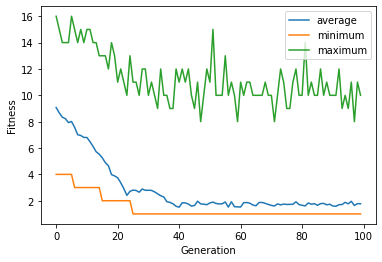

In [22]:
gen = range(100)
avg_list = []
max_list = []
min_list = []

pop = toolbox_q.population(n=300)

# Evaluate the entire population
fitnesses = list(map(toolbox_q.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Begin the evolution
for g in gen:
    print("-- Generation %i --" % g)

    # Select the next generation individuals
    offspring = toolbox_q.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolbox_q.clone, offspring))

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox_q.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.2:
            toolbox_q.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox_q.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population
    pop[:] = offspring

    # Gather all the fitnesses in one list and print the stats
    fits = [ind.fitness.values[0] for ind in pop]

    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5
    g_max = max(fits)
    g_min = min(fits)
        
    avg_list.append(mean)
    max_list.append(g_max)
    min_list.append(g_min)

    print("  Min %s" % g_min)
    print("  Max %s" % g_max)
    print("  Avg %s" % mean)
    print("  Std %s" % std)

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    
import matplotlib.pyplot as plt
plt.plot(gen, avg_list, label="average")
plt.plot(gen, min_list, label="minimum")
plt.plot(gen, max_list, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper right")
plt.show()

After running the code cells above, you should see a plot of the average, minimum, and maximum over 100 generations. We added lists to store the average, minimum, and maximum of each generation and then used matplotlib to plot all of the data. Plots are useful because they show us useful information about the data we collected. In the plot above, we can see the average and minimum reach a stable bend at around 20-30 generations in. Now we have a visualization of one of the optimization problems we instructed you to solve.